In [ ]:
import numpy as np
import matplotlib.pylab as plt
from tools import Config
from tools_evo_dyn import tau_leap_symbiosis_mutation
import pandas as pd
import pickle

In [2]:
cg_evo_1 =  Config(dict(eta = 4., g = 0.312, mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1,
                        r = 2.3, d = 1.3, theta = 8., v = 4., h = 0.382, nu_max = 3))

In [ ]:
np.random.seed(125)
V = 2000
init = np.array([0.1, 1., 0.2])
ds_1 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 8000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([3, -0.5]), sigma_rho = 0.1, sigma_nu = 0.1, 
                                         mutant_rate = 0.001, step = 8000)

Simulation stop at time step 1404399 as total Fs = 677.0, total As = 13.0, Hs = 0.0


In [30]:
with open("data_evol_traject/ds1_scenario2_exp.pkl", "wb") as f:
    pickle.dump(ds_1, f)

In [ ]:
np.random.seed(10)
V = 200
init = np.array([0.1, 1., 0.2])
ds_2 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 8000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([2, -1]), sigma_rho = 0.1, sigma_nu = 0.1, 
                                         mutant_rate = 0.001, step = 8000)

In [36]:
with open("data_evol_traject/ds2_scenario2_exp.pkl", "wb") as f:
    pickle.dump(ds_2, f)

In [ ]:
np.random.seed(102)
V = 100
init = np.array([0.1, 1., 0.2])
ds_3 = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 2000000, dt = 1, cg = cg_evo_1, V = V, 
                                         trait_init = np.array([2, -0.5]), sigma_rho = 0.5, sigma_nu = 0.2, 
                                         mutant_rate = 0.001, step = 200)

/Users/phuongnguyen/Work/symbiosis_3D_tradeoff/tools_evo_dyn.py:8: RuntimeWarning: invalid value encountered in power
  return cg.theta - cg.v * rho**cg.h + (cg.eta * nu * (nu + cg.d) ** cg.g) / cg.nu_max


In [6]:
dss_3 = turn_raw_dat_to_sorted_arrays(ds_3)

Text(0.5, 1.0, 'Bound reproduction $\\tau$')

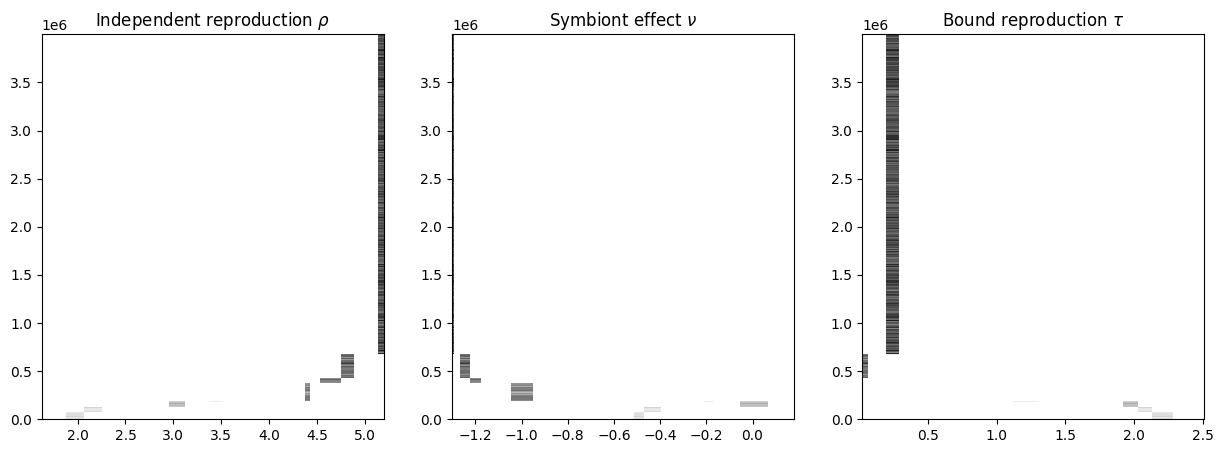

In [8]:
popmin_thres = 10
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
cc = np.where(np.sum(dss_3["xF_rho"] > popmin_thres, axis = 0) > 0)
ZZ = dss_3["xF_rho"][:, cc[0]]
XX, YY = np.meshgrid(dss_3["rho_sort"][cc[0]], ds_3["t"])
axes[0].pcolormesh(XX, YY, ZZ/V, cmap = "Greys")
axes[0].set_title(r"Independent reproduction $\rho$")
cc = np.where(np.sum(dss_3["xF_nu"] > popmin_thres, axis = 0) > 0)
ZZ = dss_3["xF_nu"][:, cc[0]]
XX, YY = np.meshgrid(dss_3["nu_sort"][cc[0]], ds_3["t"])
axes[1].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[1].set_title(r"Symbiont effect $\nu$")
cc = np.where(np.sum(dss_3["xF_tau"] > popmin_thres, axis = 0) > 0)
ZZ = dss_3["xF_tau"][:, cc[0]]
XX, YY = np.meshgrid(dss_3["tau_sort"][cc[0]], ds_3["t"])
axes[2].pcolormesh(XX, YY, ZZ, cmap = "Greys")
axes[2].set_title(r"Bound reproduction $\tau$")

In [9]:
sum(ds_3["x_F"][-1]), sum(ds_3["x_A"][-1]), sum(ds_3["x_H"][-1])

(np.float64(224.0), np.float64(126.0), np.float64(54.0))